# Problem Statement

<div class="row" style="margin-bottom: 3rem; margin-right: 0px; margin-left: 0px;">
                        <div class="col-sm-2">
                            <img src="https://www.insaid.co/wp-content/uploads/2022/05/INSAID-removebg-preview.png" width="100px" style="margin-top: 23px;margin-left: -23px;">
                        </div>
                        <div class="col-sm-5" style="padding-top: 19px; padding-left:0px;     margin-left: -27px;">
                            <h3><b>Insaid Telecom</b></h3>
                        </div>
                    </div>
                    <h5><b>Company Introduction</b></h5>
                    <p class="mx-3">Your company for this project is <b>InsaidTelecom</b>.</p>
                    <ul class="mx-5">
                            <li class="mb-2"><b>InsaidTelecom</b>, one of the leading telecom players, understands that customizing offerings is very important for its business to stay competitive.</li>
                            <li class="mb-2">Currently, <b>InsaidTelecom</b> is seeking to leverage behavioural data from more than <b>60%</b> of the <b>50 million mobile devices</b> active daily in India</li>
                            <li class="mb-2">They are doing this to help their clients better understand and interact with their audiences.</li>
            </ul>                
                        <br>
                        <h5><b>Current Scenario</b></h5>
                         <ul class="mx-5">
                            <li class="mb-2">In this consulting assignment, Insaidians are expected to <b>build a dashboard</b>.</li>
                            <li class="mb-2">This dashboard will help us to understand a user's demographic characteristics based on their <b>mobile usage, geolocation</b>, and <b>mobile device properties</b></li>
                            <li class="mb-2">Doing so will help millions of developers and brand advertisers around the world pursue <b>data-driven marketing efforts</b>.</li>
                            <li class="mb-2">These efforts are relevant to their users and cater to their preferences.</li>
                            
                        

# Install & Import Libraries and Data Loading

In [2]:
import mysql.connector
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
from collections import Counter
from tkinter import *
from geopy.geocoders import Nominatim

#import pandas_profiling
import matplotlib.pyplot as plt  
import seaborn as sns  
from googletrans import Translator          
%matplotlib inline
sns.set()

In [3]:
#!pip3 install mysql.connector
#!pip3 install folium
#!pip3 install geopy
#!pip3 uninstall googletrans
#!pip3 install googletrans==3.1.0a0

In [ ]:
#!pip3 uninstall googletrans
#!pip3 install googletrans==4.0.0rc1

# Connection with the Database

In [4]:
# connection details
cnx = mysql.connector.connect(
   host="cpanel.insaid.co",
   user="student",
   passwd="student",
   database='Capstone1'
)

# Data Loading

In [5]:
# open cursor
cursor = cnx.cursor()
# query
query = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE table_schema ='Capstone1'"
# execute query
cursor.execute(query)
# fetch results
result = cursor.fetchall()
# print results
for table in result:
    print (table)

# close connection
#cnx.close()

(bytearray(b'events_data'),)
(bytearray(b'gender_age_train'),)
(bytearray(b'phone_brand_device_model'),)


In [6]:
cursor = cnx.cursor()

In [7]:
query_gender = ("SELECT * FROM gender_age_train")
query_phone = ("SELECT * FROM phone_brand_device_model")

In [8]:
cursor.execute(query_gender)
table_rows = cursor.fetchall()
df_gender = pd.DataFrame(table_rows,columns = ['device_id','gender','age','group'])

In [9]:
cursor.execute(query_phone)
table_rows = cursor.fetchall()
df_phone = pd.DataFrame(table_rows, columns=['device_id', 'phone_brand', 'device_model'])

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [143]:
df_all_events = pd.read_csv('/content/drive/MyDrive/events_data.csv')

# Data Description

In [12]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [147]:
missing_data(df_gender)

,Total,Percent
device_id,0,0.0
gender,0,0.0
age,0,0.0
group,0,0.0


In [146]:
missing_data(df_phone)

,Total,Percent
device_id,0,0.0
phone_brand,0,0.0
device_model,0,0.0


In [144]:
missing_data(df_all_events)

,Total,Percent
device_id,453,0.013926
longitude,423,0.013004
latitude,423,0.013004
state,377,0.011589
event_id,0,0.000000
timestamp,0,0.000000
city,0,0.000000


In [16]:
df_gender.shape

(74645, 4)

In [17]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [18]:
df_gender.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [19]:
df_gender.describe(include='all')

,device_id,gender,age,group
count,7.464500e+04,74645,74645.000000,74645
unique,NaN,2,NaN,12
top,NaN,M,NaN,M23-26
freq,NaN,47904,NaN,9605
mean,-7.491354e+14,NaN,31.410342,NaN
std,5.327150e+18,NaN,9.868735,NaN
min,-9.223067e+18,NaN,1.000000,NaN
25%,-4.617367e+18,NaN,25.000000,NaN
50%,-1.841362e+16,NaN,29.000000,NaN
75%,4.636656e+18,NaN,36.000000,NaN


In [20]:
df_gender.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [21]:
df_gender['gender'].value_counts()

M    47904
F    26741
Name: gender, dtype: int64

In [22]:
df_gender[df_gender['age'] < 17].value_counts()
#df_gender[df_gender['age']== 1].value_counts()
#df_gender[df_gender['age']== 6].value_counts()

device_id             gender  age  group
-9212513776481334845  M       16   M22-     1
 3892192893469744801  M       16   M22-     1
 4151013233448863903  M       16   M22-     1
 4132659090399937108  M       16   M22-     1
 4081379884944103999  M       15   M22-     1
                                           ..
-2629814299094432151  F       15   F23-     1
-2721858939728131947  M       14   M22-     1
-2780042798863429621  F       16   F23-     1
-2788365315338707526  M       15   M22-     1
 9103157585730588617  M       15   M22-     1
Length: 305, dtype: int64

In [23]:
#df_gender[df_gender.loc(df_gender[df_gender.age < 18]), 'age'] = 18

In [24]:
# Male users age group wise to see which group has maximum mobile usage
#plt.figure(figsize=(15,5))
#df_gender[df_gender['gender']=='M']['group'].value_counts().plot.barh()
#plt.xlabel("# Count")
#plt.ylabel("Age Groups")

In [25]:
# Female users age group wise to see which group has maximum mobile usage
#plt.figure(figsize=(15,5))
#df_gender[df_gender['gender']=='F']['group'].value_counts().plot.barh()
#plt.xlabel("# Count")
#plt.ylabel("Age Groups")

In [26]:
#plt.figure(figsize=(15,5))
#range = (10,90)
#plt.hist(df_gender['age'], 10, range, color = 'green', histtype = 'bar', rwidth = 0.9)
#plt.ylabel("# Count")
#plt.xlabel("Age")

In [27]:
#plt.figure(figsize=(15,5))
#range = (10,90)
#plt.hist(df_gender[df_gender['gender']=='M']['age'], 10, range, color = 'green', histtype = 'bar', rwidth = 0.9)
#plt.ylabel("# Count")
#plt.xlabel("Age")

In [28]:
#plt.figure(figsize=(15,5))
#range = (10,90)
#plt.hist(df_gender[df_gender['gender']=='F']['age'], 10, range, color = 'green', histtype = 'bar', rwidth = 0.9)
#plt.ylabel("# Count")
#plt.xlabel("Age")

**Observations**



1.   People of age group 20 to 40 are using mobiles more as compared to other age groups.
2.   Mojority of people stops using mobile after the age of 60.
3.   Males are using mobile more than females.
4.   People start using mobile after the age of 10.

*Person whose age is 1 is also using mobile so it is outlier*

# Phone Data Analysis

In [29]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [30]:
df_phone.shape

(87726, 3)

In [31]:
df_phone.describe()

,device_id
count,8.772600e+04
mean,-5.212557e+15
std,5.330157e+18
min,-9.223322e+18
25%,-4.623331e+18
50%,-3.109802e+16
75%,4.635194e+18
max,9.222849e+18


In [32]:
df_phone.describe(include='all')

,device_id,phone_brand,device_model
count,8.772600e+04,87726,87726
unique,NaN,116,1467
top,NaN,小米,红米note
freq,NaN,21645,3500
mean,-5.212557e+15,NaN,NaN
std,5.330157e+18,NaN,NaN
min,-9.223322e+18,NaN,NaN
25%,-4.623331e+18,NaN,NaN
50%,-3.109802e+16,NaN,NaN
75%,4.635194e+18,NaN,NaN


**Observations** No Null Values in Phone Brand Device Data

In [33]:
df_phone.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [34]:
phonedata2 = iter(df_phone['phone_brand'].unique())
translator= Translator()

for var in phonedata2:
    try:
        translation = translator.translate(var, src='zh-cn', dest='en').text
        df_phone.phone_brand=df_phone.phone_brand.replace(var,translation)
    except:
        print("Error to translate: ", var)

df_phone.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,Millet,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,Samsung,A368t
4,-2015528097870762664,Millet,红米Note2


In [35]:
phonedata2 = iter(df_phone['device_model'].unique())
translator= Translator()

for var in phonedata2:
    try:
        translation = translator.translate(var, src='zh-cn', dest='en').text
        df_phone.device_model=df_phone.device_model.replace(var,translation)
    except:
        print("Error to translate: ", var)

df_phone.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,Millet,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,Samsung,A368t
4,-2015528097870762664,Millet,redmi note2


In [36]:
df_phone['phone_brand'].value_counts().head(10)

Millet     21645
Samsung    19211
Huawei     15181
vivo        7596
OPPO        6717
Meizu       5531
Coolpad     3979
HTC         1272
Lenovo       982
LeTV         841
Name: phone_brand, dtype: int64

In [37]:
#plt.figure(figsize=(15,5))
#df_phone['phone_brand'].value_counts().head(10).plot.bar()
#plt.ylabel("# Count")
#plt.xlabel("Phone Brands")

In [38]:
df_phone['device_model'].value_counts().head(10)

redmi note       3500
MI 3             2739
MI 2S            2547
Galaxy Note 3    2378
MI 4             2256
Galaxy S4        1910
Galaxy Note 2    1877
glory 6          1471
Honor Play 4X    1279
Honor 3C         1206
Name: device_model, dtype: int64

In [39]:
#plt.figure(figsize=(15,5))
#df_phone['device_model'].value_counts().head(10).plot.bar()
#plt.ylabel("# Count")
#plt.xlabel("Device Models")

In [40]:
for i in df_phone['phone_brand'].head(10).unique():
    print ('-----',i,'------')
    print (df_phone[df_phone['phone_brand']==i]['device_model'].value_counts().head())

----- vivo ------
X3T      425
X5Pro    401
X3L      333
Xplay    293
X5SL     279
Name: device_model, dtype: int64
----- Millet ------
redmi note    3500
MI 3          2739
MI 2S         2547
MI 4          2256
Redmi 1S      1191
Name: device_model, dtype: int64
----- OPPO ------
R7         663
R7 Plus    459
R7s        423
Find 7     381
R3         335
Name: device_model, dtype: int64
----- Samsung ------
Galaxy Note 3    2378
Galaxy S4        1910
Galaxy Note 2    1877
Galaxy S3        1156
Galaxy S5         827
Name: device_model, dtype: int64


**Observations**



1.   Xiaomi, Samsung and Huawei brands are preferred by majority of people.
2.   Redmi note, MI 3, MI 2S, MI 4, Galaxy Note 3 are top 5 device models.

# Events Data Analysis

In [41]:
df_all_events.shape

(3252950, 7)

In [42]:
df_all_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [43]:
df_all_events.describe()

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


In [44]:
def setState(city):
  geolocator = Nominatim(user_agent="my-application")
  coordinates = geolocator.geocode(city)  #.get('state', '')
  location = geolocator.reverse(str(coordinates.latitude) + ", " + str(coordinates.longitude))
  address = location.raw['address']
  state = address.get('state', '').replace(" ", "")
  print(city, state)

In [45]:
for index, row in df_all_events.groupby("city")["latitude"].describe().iterrows():
    #setState(index + " India")
    if (row["max"]-row["min"])>1:
        setState(index + " India")
    #    print(index,row["max"],row["min"])

Aurangabad India Maharashtra
Bari India Rajasthan
Bhadravati India Maharashtra
Chennai India TamilNadu
Delhi India Delhi
Fatehpur India UttarPradesh
Ilkal India Karnataka
Indore India MadhyaPradesh
Jaipur India Rajasthan
Masaurhi India Bihar
Mau India UttarPradesh
Pune India Maharashtra
Purnia India Bihar
Sagar India MadhyaPradesh
Shahabad India UttarPradesh
Shrirampur India Maharashtra
Sikandarabad India Telangana
Visakhapatnam India AndhraPradesh


In [46]:
df_all_events[df_all_events.city == 'Delhi'].describe()

,event_id,device_id,longitude,latitude
count,7.442760e+05,7.442070e+05,744213.000000,744213.000000
mean,1.619419e+06,-6.148570e+16,77.265087,28.725504
std,9.434700e+05,5.345143e+18,0.140605,0.039132
min,1.000000e+00,-9.222957e+18,12.567400,25.204800
25%,8.012695e+05,-4.734045e+18,77.242286,28.703781
50%,1.620093e+06,-1.370062e+17,77.265771,28.725802
75%,2.435959e+06,4.750870e+18,77.287860,28.747502
max,3.252944e+06,9.219164e+18,77.309956,41.871900


In [47]:
df_all_events[df_all_events['state'].isnull()]['city'].unique()
#df_all_events[df_all_events['state'] == 'WestBengal']['city'].unique()

array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

In [124]:
missing_data(df_all_events)

,Total,Percent
longitude,423,0.013004
latitude,423,0.013004
event_id,0,0.000000
device_id,0,0.000000
timestamp,0,0.000000
city,0,0.000000
state,0,0.000000


In [49]:
#tempdata1 = iter(df_all_events[df_all_events['state'].isnull()]['city'].unique())
#
#for ct in tempdata1:
#    print(ct)
#    print(df_all_events['state'][df_all_events['city']==ct].value_counts())
#    print(df_all_events['state'][df_all_events['city']==ct].mode().iat[0])

# Missing State Manipulation

In [145]:
tempdata1 = iter(df_all_events[df_all_events['state'].isnull()]['city'].unique())

for ct in tempdata1:
    df_all_events.loc[(df_all_events['city'] ==ct) \
        & (df_all_events['state'].isnull()),'state'] = df_all_events['state'][df_all_events['city']==ct].mode().iat[0]

In [51]:
#tempdata1 = iter(df_all_events[df_all_events['device_id'].isnull()]['longitude'].unique())

#for ct in tempdata1:
#    print(ct)
#    print(df_all_events['device_id'][df_all_events['longitude']==ct].value_counts())
#    print(df_all_events['device_id'][df_all_events['longitude']==ct].mode().iat[0])

In [52]:
#tempdata1 = iter(df_all_events[df_all_events['device_id']]['city'].unique())
#tempdata1=df_all_events.groupby(['city'])

#for index, item in enumerate((df_all_events.groupby(['device_id'])['city'].nunique()>1).values):
        #print(index, item)
#        if (item == True):
#            print(index, item)

#tempdata1.head()

#for ct in tempdata1:
#    print(ct)
#    print(df_all_events['device_id'][df_all_events['city']==ct].value_counts())
#    print(df_all_events['device_id'][df_all_events['city']==ct].mode().iat[0])

In [142]:
tempdata1 = iter(df_all_events[df_all_events['device_id'].isnull()]['longitude'].unique())

for ct in tempdata1:
    print("Longitude", ct)
    print("Latitude", df_all_events['latitude'][df_all_events['longitude']==ct].mode().iat[0])
    print("City", df_all_events['city'][df_all_events['longitude']==ct].mode().iat[0])
#    print(df_all_events['device_id'][df_all_events['longitude']==ct].value_counts())
    print(df_all_events['device_id'][df_all_events['longitude']==ct].mode().iat[0])
#    print(df_all_events['device_id'][df_all_events['latitude']==ct].mode().iat[0])

Longitude 75.88295600000002
Latitude 22.814519
City Indore
3.1328613559497626e+18
Longitude 75.888487
Latitude 26.948689
City Jaipur
-9.177251100412943e+17
Longitude 75.846007
Latitude 26.960796
City Jaipur
-8.460337302442786e+18
Longitude 75.92333199999999
Latitude 22.777781
City Indore
7.597735768595925e+18
Longitude 75.99255099999998
Latitude 31.561747
City Hoshiarpur
1.750778632182067e+18
Longitude 73.862756
Latitude 18.628057
City Pune
9.027085705222633e+18
Longitude 73.86016500000002
Latitude 18.566925
City Pune
8.539870903150472e+18
Longitude 83.357991
Latitude 17.805195
City Visakhapatnam
6.844192269280791e+18
Longitude 77.29248100000002
Latitude 28.719966000000003
City Delhi
5.098778421671838e+18
Longitude 73.92649899999998
Latitude 18.614812
City Pune
1.771585711650787e+17
Longitude 80.34361299999998
Latitude 13.153332
City Chennai
5.731369272434022e+18
Longitude 80.30927199999998
Latitude 13.149176
City Chennai
7.66213914371992e+18
Longitude 77.27481399999998
Latitude 28.721

# Missing DeviceID Manipulation

In [53]:
tempdata1 = iter(df_all_events[df_all_events['device_id'].isnull()]['longitude'].unique())

for ct in tempdata1:
    df_all_events.loc[(df_all_events['longitude'] ==ct) \
        & (df_all_events['device_id'].isnull()),'device_id'] = df_all_events['device_id'][df_all_events['longitude']==ct].mode().iat[0]

# Missing Longitude & Latitude Manipulation

In [148]:
tempdata1 = iter(df_all_events[df_all_events['longitude'].isnull()]['device_id'].unique())

for ct in tempdata1:
    df_all_events.loc[(df_all_events['device_id'] ==ct) \
        & (df_all_events['longitude'].isnull()),'longitude'] = df_all_events['longitude'][df_all_events['device_id']==ct].mode().iat[0]
    df_all_events.loc[(df_all_events['device_id'] ==ct) \
        & (df_all_events['latitude'].isnull()),'latitude'] = df_all_events['latitude'][df_all_events['device_id']==ct].mode().iat[0]

In [55]:
#tempdata1 = iter(df_all_events[['longitude','latitude']].nunique())
#tempdata1 = df_all_events[['longitude','latitude']].unique()

#for ct in tempdata1:
#  print(ct)
#    df_all_events.loc[(df_all_events['device_id'] ==ct) \
#        & (df_all_events['longitude'].isnull()),'longitude'] = df_all_events['longitude'][df_all_events['device_id']==ct].mode().iat[0]
#    df_all_events.loc[(df_all_events['device_id'] ==ct) \
#        & (df_all_events['latitude'].isnull()),'latitude'] = df_all_events['latitude'][df_all_events['device_id']==ct].mode().iat[0]

In [149]:
df_all_events.shape

(3252950, 7)

In [150]:
stateoptions = ['TamilNadu','Manipur','Chandigarh','Tripura','UttarPradesh','ArunachalPradesh']
df_events = df_all_events.loc[df_all_events['state'].isin(stateoptions)]
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
6,2948755,5.536513e+18,2016-05-03 16:20:14,80.359796,13.128174,Chennai,TamilNadu
10,3219828,-3.433061e+18,2016-05-03 00:27:21,80.290779,13.115427,Chennai,TamilNadu
14,460645,7.983871e+18,2016-05-04 21:04:40,80.335435,13.189053,Chennai,TamilNadu
15,998037,7.594216e+18,2016-05-03 20:59:09,80.306871,13.172970,Chennai,TamilNadu


In [58]:
df_events.shape

(534462, 7)

In [59]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 3 to 3252949
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   534462 non-null  int64  
 1   device_id  534462 non-null  float64
 2   timestamp  534462 non-null  object 
 3   longitude  534462 non-null  float64
 4   latitude   534462 non-null  float64
 5   city       534462 non-null  object 
 6   state      534462 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 32.6+ MB


In [151]:
df_gender['device_id'] = df_gender['device_id'].astype("float64")
df_phone['device_id'] = df_phone['device_id'].astype("float64")
df_final = df_events.merge(df_gender,on='device_id').merge(df_phone,on='device_id')
df_final.shape

(534399, 12)

In [152]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534399 entries, 0 to 534398
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   event_id      534399 non-null  int64  
 1   device_id     534399 non-null  float64
 2   timestamp     534399 non-null  object 
 3   longitude     534399 non-null  float64
 4   latitude      534399 non-null  float64
 5   city          534399 non-null  object 
 6   state         534399 non-null  object 
 7   gender        534399 non-null  object 
 8   age           534399 non-null  int64  
 9   group         534399 non-null  object 
 10  phone_brand   534399 non-null  object 
 11  device_model  534399 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 53.0+ MB


In [62]:
#df = df_all_events.drop_duplicates(subset=['longitude','latitude'])
#for lat in df[['longitude'],['latitude']]:
#  print(lat)
    #diff=df_all_events[df_all_events[['longitude','latitude']]==lat]['city']
    #for i in diff:
    #  temp_events=pd.DataFrame([[lat,i]],columns=['Lat','city'])]
#df_covid.sort_values('Date',inplace=True)
#df.info()

In [63]:
def setCityState(lat, long):
  coordinates = str(lat) + ", " + str(long)
  geolocator = Nominatim(user_agent="MyTest")

  location = geolocator.reverse(coordinates)

  address = location.raw['address']

  city = address.get('city', '').replace(" ", "")
  state = address.get('state', '').replace(" ", "")
  country = address.get('country', '')
  df_all_events.loc[(df_all_events['latitude'] == lat) & (df_all_events['longitude'] == long),'city'] = city
  df_all_events.loc[(df_all_events['latitude'] == lat) & (df_all_events['longitude'] == long),'state'] = state

  print(city, state, country, str(long) + ", " + str(lat))

In [64]:
for index, item in enumerate((df_all_events.groupby(['longitude','latitude'])['city'].nunique()>1).values):
        if (item == True):
            print(index, item)
            setCityState(df_all_events.loc[index]['latitude'], df_all_events.loc[index]['longitude'])

1 True
NorthDumdum WestBengal India 88.388361, 22.660325
2 True
Ghaziabad UttarPradesh India 77.25680899999998, 28.757906
3 True
Chennai TamilNadu India 80.34361299999998, 13.153332


In [65]:
def getLong(row):
    long = row['longitude']
    city = row['city']
   
    if (pd.notnull(city) and ((long =='') or (pd.isnull(long)))):
        print(row['device_id'])
        longM = phone_data['longitude'][(phone_data['city'] == city) & (pd.notnull(phone_data['longitude']))].mode()[0]
        return longM
    else:
        return long

# Adding Age Range

In [66]:
# categorising age to age range
df_final["age_range"] = pd.cut(df_final['age'], [0, 17, 29,49,64,500], labels=['<18','18-29','30-49','50-64','65+'], include_lowest=True)
df_final.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,age_range
0,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26,HTC,One max,18-29
1,2330011,5.731369e+18,2016-05-05 12:44:32,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26,HTC,One max,18-29
2,1895687,5.731369e+18,2016-05-02 12:45:05,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26,HTC,One max,18-29
3,619715,5.731369e+18,2016-05-02 03:37:12,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26,HTC,One max,18-29
4,936200,5.731369e+18,2016-05-04 19:18:59,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26,HTC,One max,18-29


In [67]:
#map2 = folium.Map(location=[88.388361, 22.660325], zoom_start=5)
#mc2 = MarkerCluster()
#locations = mapping_data[['22.660325', '88.388361']]
#locationlist = locations.values.tolist()
    
#    for index, item in enumerate(locationlist):
#        mc2.add_child(folium.Marker(location=item, popup=citylist[index]))
                             
#map2.add_child(mc2)
#map2.save("state_wise_map_plot2.html")
#map2

In [68]:
#df2 = df_all_events.groupby(['longitude','latitude'])  #['city'].nunique()
#df3 = df2.filter(lambda x: len(x) > 1)
#df3.head(1000)

# Map generation using folium for mentioned States
To verify if each state has correct longitude and latitude

In [69]:
map2 = folium.Map(location=[88.388361, 22.660325], zoom_start=3)
mc2 = MarkerCluster()
state_list = ['UttarPradesh','TamilNadu','Manipur','Chandigarh','Tripura','ArunachalPradesh']

for state in state_list:
    file = state + "_map_plot2.html"
    map2 = folium.Map(location=None)
    mc2 = MarkerCluster()
    mapping_data = df_all_events[['latitude', 'longitude','city']][df_all_events['state']==state].drop_duplicates()
    citylist = mapping_data['city'].tolist()
        
    locations = mapping_data[['latitude', 'longitude']]
    locationlist = locations.values.tolist()
    
    for index, item in enumerate(locationlist):
        mc2.add_child(folium.Marker(location=item, popup=citylist[index]))
        #print(item, citylist[index], index)
                             
    map2.add_child(mc2)
    map2.save(file)
#map2

# Fix City-State anomaly based on Map

In [70]:
#Based on map generated above, finding Outliers for UP
df_all_events[(df_all_events.state=='UttarPradesh') & (df_all_events.longitude<77)]

,event_id,device_id,timestamp,longitude,latitude,city,state
577,1198755,-3.538749e+17,2016-05-01 10:27:12,72.367590,23.389080,Kadi,UttarPradesh
1431,1044870,6.527842e+17,2016-05-02 18:52:18,72.394669,23.327080,Kadi,UttarPradesh
2622,1831495,5.353430e+17,2016-05-03 16:21:39,72.365270,23.375839,Kadi,UttarPradesh
7502,319056,-3.538749e+17,2016-05-04 20:47:10,72.367590,23.389080,Kadi,UttarPradesh
10020,726659,5.353430e+17,2016-05-07 21:54:23,72.365270,23.375839,Kadi,UttarPradesh
...,...,...,...,...,...,...,...
3237432,996630,4.578386e+18,2016-05-03 20:35:23,72.389010,23.368421,Kadi,UttarPradesh
3238700,2559718,8.551222e+18,2016-05-02 17:06:17,72.382581,23.377576,Kadi,UttarPradesh
3242763,779492,-3.538749e+17,2016-05-05 22:28:22,72.367590,23.389080,Kadi,UttarPradesh
3247998,1459838,-8.422432e+18,2016-05-04 19:41:52,72.425512,23.330159,Kadi,UttarPradesh


In [71]:
df_all_events[df_all_events.city=='Kadi'].groupby(['state','city']).count()

,,event_id,device_id,timestamp,longitude,latitude
state,city,,,,,
UttarPradesh,Kadi,947,947,947,947,947


In [72]:
df_all_events.loc[df_all_events[df_all_events.city=='Kadi'].index,'state']='Gujarat'

In [73]:
df_all_events[df_all_events.city=='Kadi'].groupby(['state','city']).count()

,,event_id,device_id,timestamp,longitude,latitude
state,city,,,,,
Gujarat,Kadi,947,947,947,947,947


# Fix anomaly in Longitude and Latitude based on Map

TamilNadu has some outlier points as per above map.
Fixing the coordinates for TamilNadu.

In [74]:
# Finding the Outliers for TN
df_all_events[(df_all_events.state=='TamilNadu') & (df_all_events.longitude<76)]

,event_id,device_id,timestamp,longitude,latitude,city,state
22269,2896853,7.758075e+18,2016-05-02 05:48:31,69.2075,34.5553,Chennai,TamilNadu
91260,563738,-1.702542e+17,2016-05-02 01:05:02,12.5674,41.8719,Chennai,TamilNadu
245718,351833,-1.702542e+17,2016-05-04 16:26:38,12.5674,41.8719,Chennai,TamilNadu
291818,594503,-1.702542e+17,2016-05-06 06:17:27,12.5674,41.8719,Chennai,TamilNadu
533423,548055,3.485513e+17,2016-05-03 12:32:08,55.2708,25.2048,Chennai,TamilNadu
1080564,3203806,7.758075e+18,2016-05-01 21:16:33,69.2075,34.5553,Chennai,TamilNadu
2393743,601176,3.485513e+17,2016-05-06 12:21:51,55.2708,25.2048,Chennai,TamilNadu
2575568,3175643,7.758075e+18,2016-05-01 05:13:10,69.2075,34.5553,Chennai,TamilNadu
2847570,352256,3.485513e+17,2016-05-02 17:12:53,55.2708,25.2048,Chennai,TamilNadu


In [75]:
df_all_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


We need to fix longitude and latitude values for following device ID's
-170254198178616704.00 , 348551303690779904.00 and 7758074839281444864.00

In [76]:
df_all_events[(df_all_events.device_id==-170254198178616704.00) & (df_all_events.longitude<76)]

,event_id,device_id,timestamp,longitude,latitude,city,state
91260,563738,-1.702542e+17,2016-05-02 01:05:02,12.5674,41.8719,Chennai,TamilNadu
245718,351833,-1.702542e+17,2016-05-04 16:26:38,12.5674,41.8719,Chennai,TamilNadu
291818,594503,-1.702542e+17,2016-05-06 06:17:27,12.5674,41.8719,Chennai,TamilNadu


In [77]:
df_all_events[(df_all_events.device_id==-170254198178616704.00)].groupby(['longitude','latitude'])['city'].count()

longitude  latitude 
12.567400  41.871900       3
80.306106  13.128897    2053
Name: city, dtype: int64

In [78]:
df_all_events[(df_all_events.device_id==-170254198178616704.00)].groupby(['device_id'])['longitude'].mean().iat[0]

80.20726547568093

In [79]:
df_all_events[(df_all_events.device_id==-170254198178616704.00)]

,event_id,device_id,timestamp,longitude,latitude,city,state
1506,2454547,-1.702542e+17,2016-05-06 14:03:49,80.306106,13.128897,Chennai,TamilNadu
2906,1392239,-1.702542e+17,2016-05-02 19:38:46,80.306106,13.128897,Chennai,TamilNadu
3483,1921243,-1.702542e+17,2016-05-06 03:37:49,80.306106,13.128897,Chennai,TamilNadu
3757,1135692,-1.702542e+17,2016-05-06 05:22:55,80.306106,13.128897,Chennai,TamilNadu
4206,1653864,-1.702542e+17,2016-05-05 18:06:06,80.306106,13.128897,Chennai,TamilNadu
...,...,...,...,...,...,...,...
3241167,384545,-1.702542e+17,2016-05-04 15:15:48,80.306106,13.128897,Chennai,TamilNadu
3243280,2807335,-1.702542e+17,2016-05-06 15:30:33,80.306106,13.128897,Chennai,TamilNadu
3244997,1677445,-1.702542e+17,2016-05-04 11:47:35,80.306106,13.128897,Chennai,TamilNadu
3247190,2968334,-1.702542e+17,2016-05-07 08:21:42,80.306106,13.128897,Chennai,TamilNadu


In [80]:
df_all_events.loc[91260,'longitude']=df_all_events.loc[1506,'longitude']
df_all_events.loc[245718,'longitude']=df_all_events.loc[1506,'longitude']
df_all_events.loc[291818,'longitude']=df_all_events.loc[1506,'longitude']

df_all_events.loc[91260,'latitude']=df_all_events.loc[1506,'latitude']
df_all_events.loc[245718,'latitude']=df_all_events.loc[1506,'latitude']
df_all_events.loc[291818,'latitude']=df_all_events.loc[1506,'latitude']

In [81]:
df_all_events[(df_all_events.device_id==-170254198178616704.00)].groupby(['longitude','latitude'])['city'].count()

longitude  latitude 
80.306106  13.128897    2056
Name: city, dtype: int64

In [115]:
df_final.shape

(534462, 19)

# Task for Week 3:

Here are the points about how Analysis should be done:


1. Distribution of Users(device_id) across States.
2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).
3. Distribution of Users across Gender.
4. Distribution of Users across Age Segments.
5. Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender.
6. Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands).
7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only the 10 Most used Phone Brands).

Note: While doing analysis for the above points, consider only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.

8. Hourly distribution of Phone Calls.
9. Plot the Users on the Map using any suitable package.

# Distribution of Users(device_id) across States

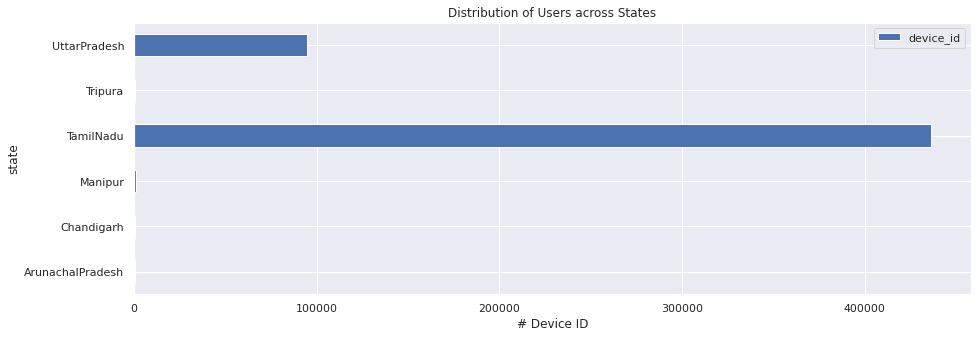

In [82]:
plt.figure(figsize=(15,5))
df_final.groupby('state').device_id.count().plot(kind='barh')
plt.title('Distribution of Users across States');
plt.xlabel("# Device ID")
plt.legend();

In [83]:
df_final.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,age_range
0,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26,HTC,One max,18-29
1,2330011,5.731369e+18,2016-05-05 12:44:32,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26,HTC,One max,18-29
2,1895687,5.731369e+18,2016-05-02 12:45:05,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26,HTC,One max,18-29
3,619715,5.731369e+18,2016-05-02 03:37:12,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26,HTC,One max,18-29
4,936200,5.731369e+18,2016-05-04 19:18:59,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26,HTC,One max,18-29


# Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands)

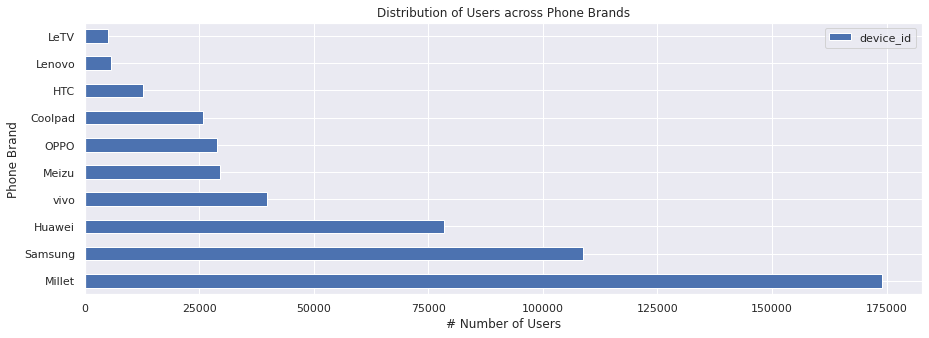

In [84]:
plt.figure(figsize=(15,5))
df_final.groupby('phone_brand').device_id.count().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Distribution of Users across Phone Brands');
plt.xlabel('# Number of Users');
plt.ylabel('Phone Brand');
plt.legend();

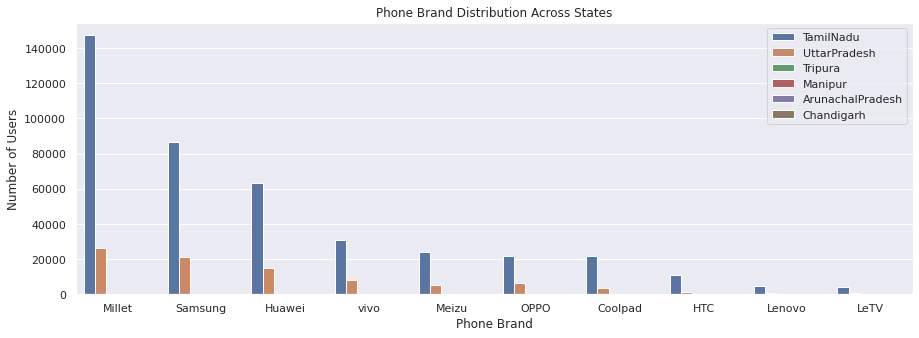

In [116]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='phone_brand', hue="state",order=df_final.phone_brand.value_counts().iloc[:10].index, data=df_final, ax=axis1)
plt.title("Phone Brand Distribution Across States")
plt.legend(loc='upper right')
plt.xlabel('Phone Brand');
plt.ylabel('Number of Users');

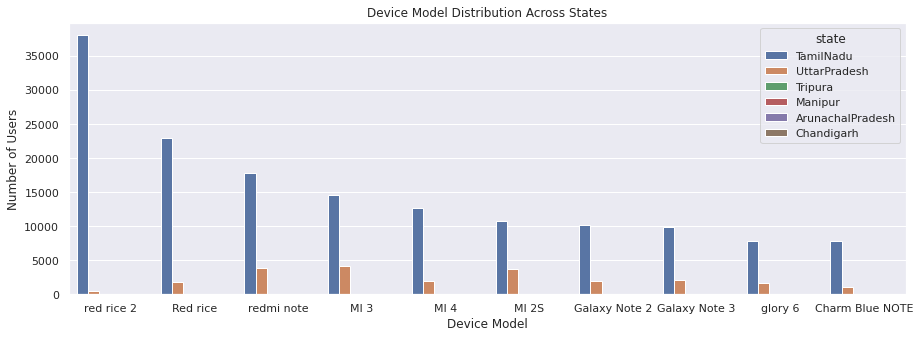

In [86]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='device_model', hue="state",order=df_final.device_model.value_counts().iloc[:10].index, data=df_final, ax=axis1)
plt.title("Device Model Distribution Across States")
plt.xlabel('Device Model');
plt.ylabel('Number of Users');

# Distribution of Users across Gender

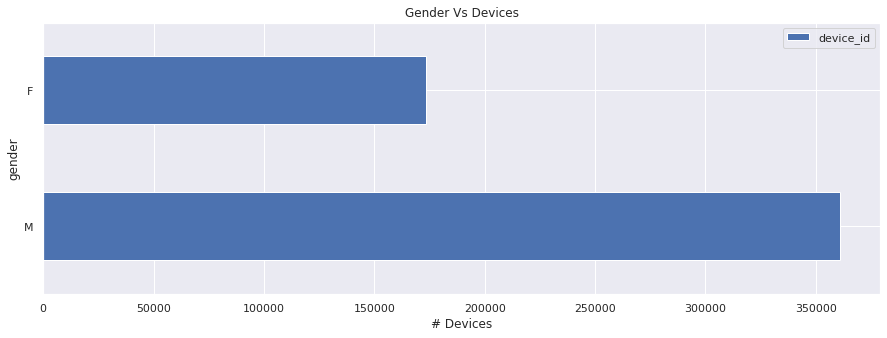

In [87]:
plt.figure(figsize=(15,5))
df_final.groupby('gender').device_id.count().sort_values(ascending=False).plot(kind='barh')
plt.title('Gender Vs Devices')
plt.xlabel('# Devices')
plt.legend()

In [88]:
#axis1 = plt.subplots(1,1,figsize=(15,5))
#splot = sns.countplot(x='gender',data=df_final)
#for p in splot.patches:
#    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
#                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#plt.title("Gender Distribution")

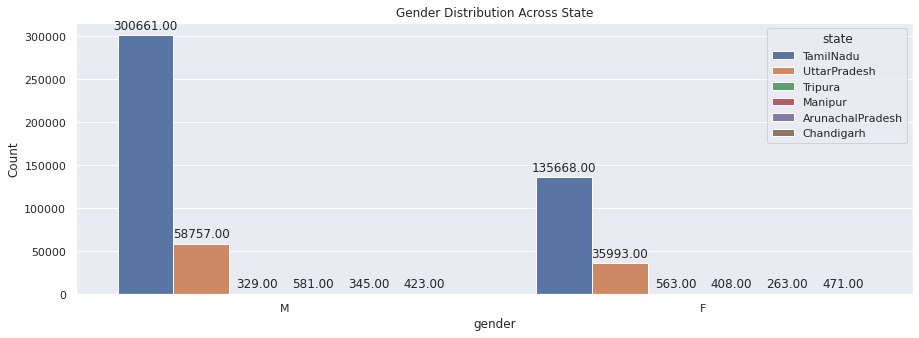

In [89]:
total = len(df_final['gender'])*1.
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
splot = sns.countplot(x='gender', hue="state", data=df_final, ax=axis1)
plt.title("Gender Distribution Across State")
plt.ylabel('Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


Text(0.5, 1.0, 'Age Group Distribution Across States')

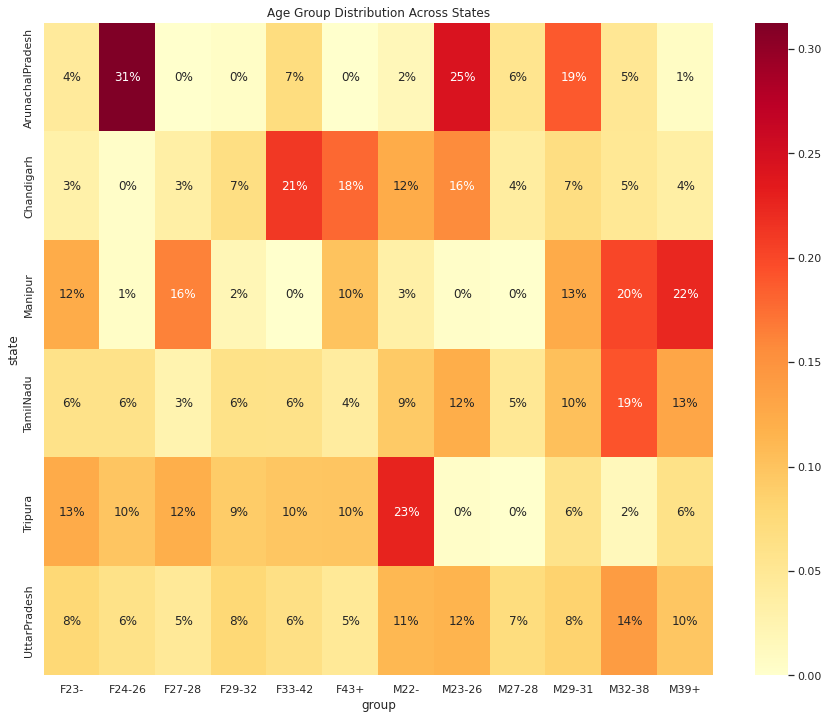

In [90]:
plt.figure(figsize=(15,12))
heat_ds = pd.crosstab(df_final['state'], df_final['group'], normalize='index')
sns.heatmap(heat_ds, annot=True, fmt='0.0%', cmap='YlOrRd')
plt.title("Age Group Distribution Across States")

# Distribution of Users across Age Segments

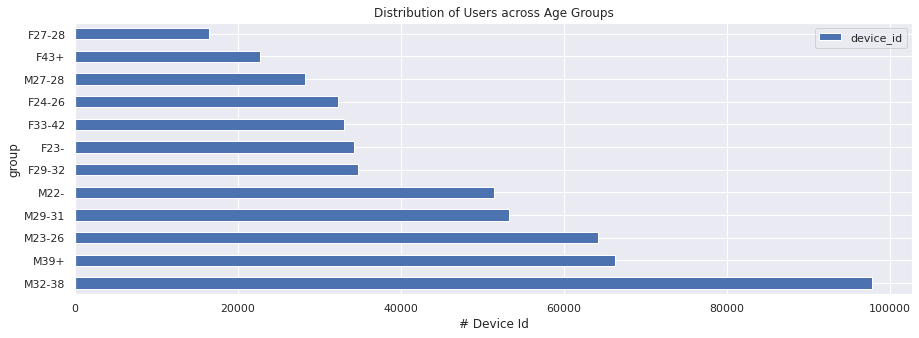

In [91]:
plt.figure(figsize=(15,5))
df_final.groupby('group').device_id.count().sort_values(ascending=False).plot(kind='barh')
plt.title('Distribution of Users across Age Groups');
plt.xlabel('# Device Id');
plt.legend();

Text(0.5, 1.0, 'Age Group Distribution Across States')

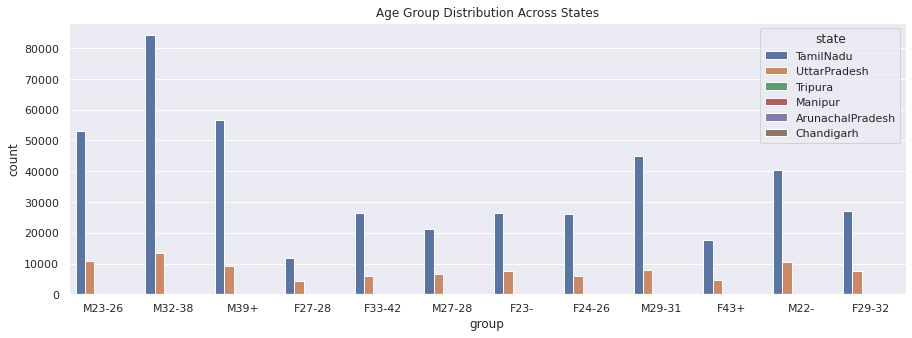

In [92]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='group', hue="state", data=df_final, ax=axis1)
plt.title("Age Group Distribution Across States")

Text(0.5, 1.0, 'Age Range Distribution Across States')

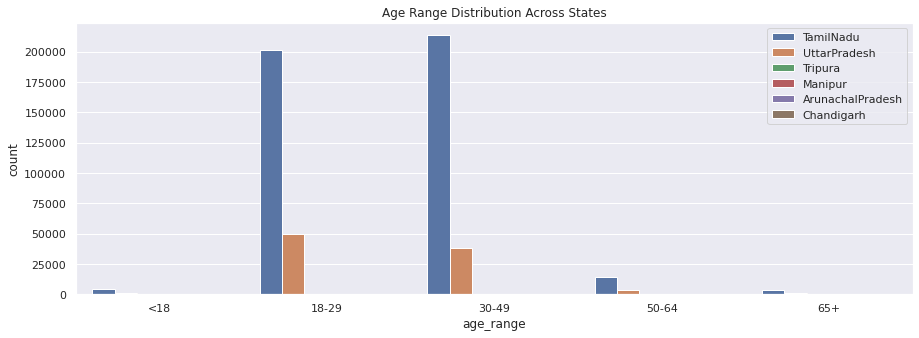

In [93]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='age_range', hue="state", data=df_final, ax=axis1)
plt.legend(loc='upper right')
plt.title("Age Range Distribution Across States")

# Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender

Text(0.5, 1.0, 'Top 10 Phone Brand Distribution Across States')

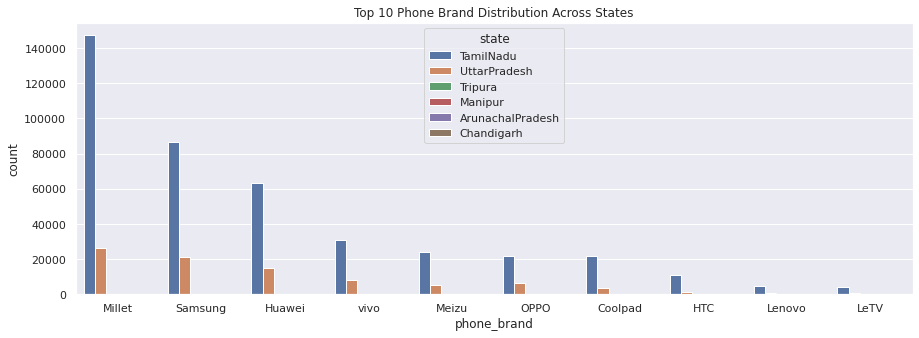

In [94]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='phone_brand', hue="state",order=df_final.phone_brand.value_counts().iloc[:10].index, data=df_final, ax=axis1)
plt.title("Top 10 Phone Brand Distribution Across States")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


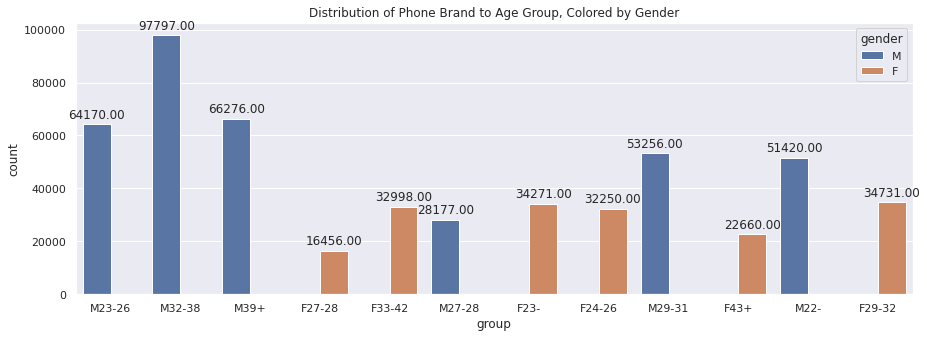

In [95]:
df_TamilNadu = df_final[df_final.state=='TamilNadu']
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
splot = sns.countplot('group', hue='gender', data=df_final);
plt.title('Distribution of Phone Brand to Age Group, Colored by Gender');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands)

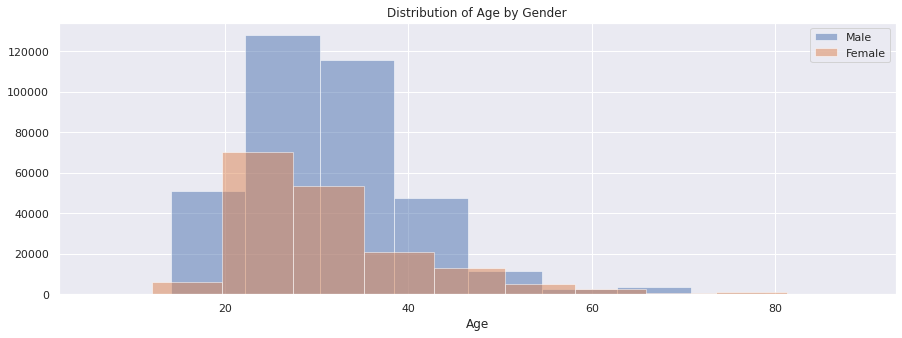

In [96]:
plt.figure(figsize=(15,5))
plt.hist('age', data=df_final[df_final['gender'] == 'M'], alpha=0.5, label='Male');
plt.hist('age', data=df_final[df_final['gender'] == 'F'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

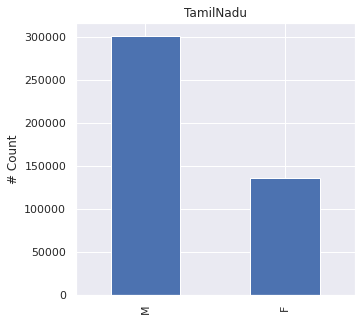

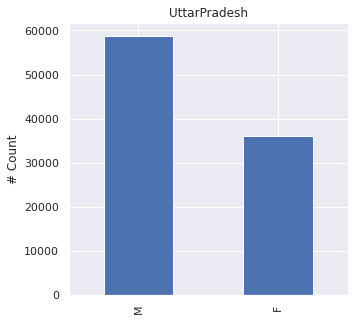

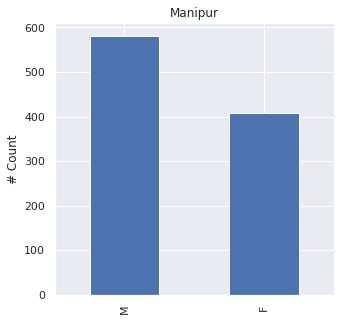

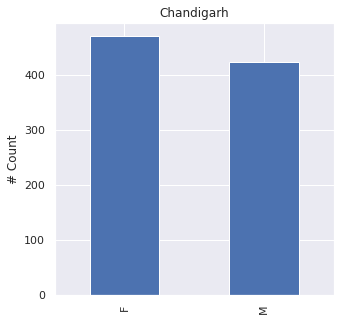

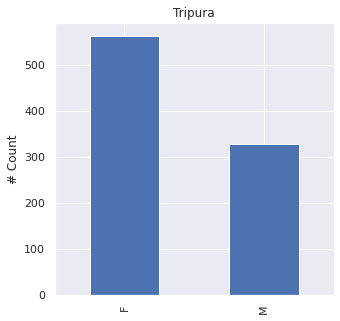

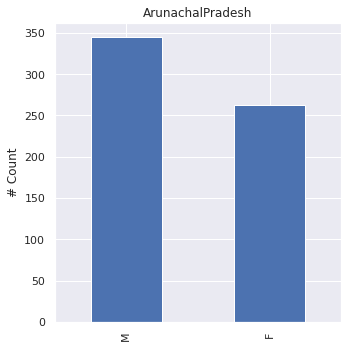

In [97]:
states = ['TamilNadu', 'UttarPradesh', 'Manipur', 'Chandigarh', 'Tripura', 'ArunachalPradesh']

for state in states:
    fig, axes = plt.subplots(figsize=(5,5))
    df_final[df_final['state']==state]['gender'].value_counts().head().plot.bar()
    plt.title(state)
    plt.ylabel('# Count')
fig.tight_layout()
fig.show() 

# Distribution of Age Segments for each State, Gender and Phone Brand(Consider only the 10 Most used Phone Brands)

In [98]:
df_final['state'].value_counts()

TamilNadu           436329
UttarPradesh         94750
Manipur                989
Chandigarh             894
Tripura                892
ArunachalPradesh       608
Name: state, dtype: int64

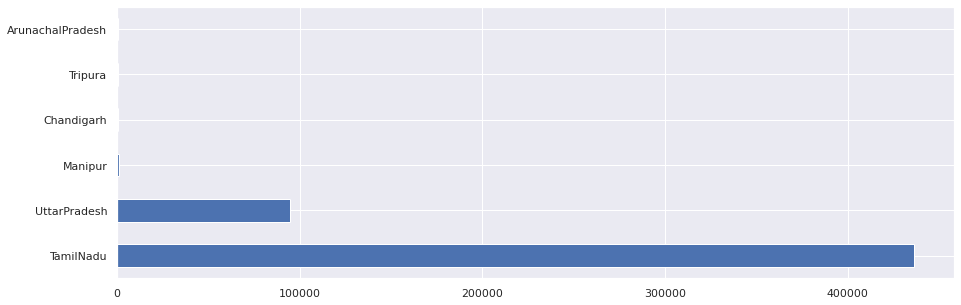

In [99]:
plt.figure(figsize=(15,5))
df_final['state'].value_counts().plot.barh()

In [100]:
df_final['city'].value_counts().iloc[:10]

Chennai           366875
Mayiladuthurai      1847
Salem               1845
Varanasi            1633
Lakhnau             1629
Bisalpur            1558
Gudiyattam          1543
Udagamandalam       1541
Chandausi           1502
Tanda               1491
Name: city, dtype: int64

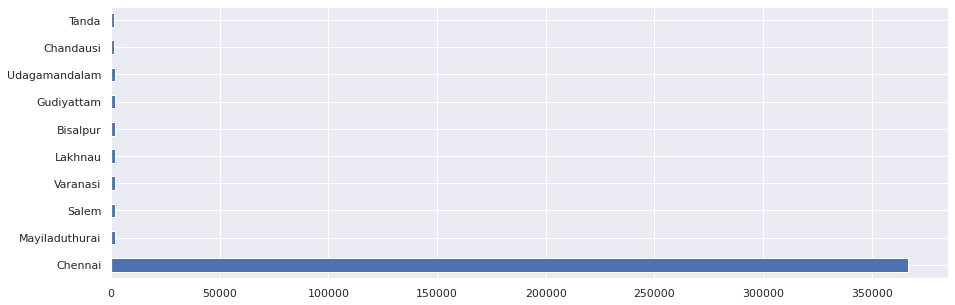

In [101]:
plt.figure(figsize=(15,5))
df_final['city'].value_counts().iloc[:10].plot.barh()

Text(0.5, 1.0, 'Top 10 Phone Brand Distribution Across States')

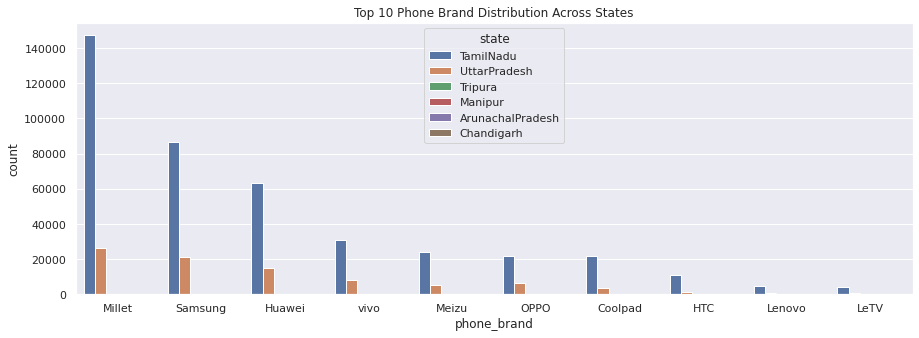

In [102]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='phone_brand', hue="state",order=df_final.phone_brand.value_counts().iloc[:10].index, data=df_final, ax=axis1)
plt.title("Top 10 Phone Brand Distribution Across States")

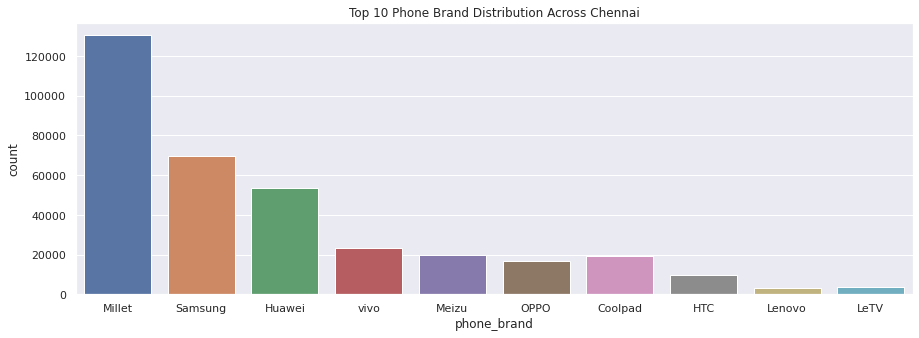

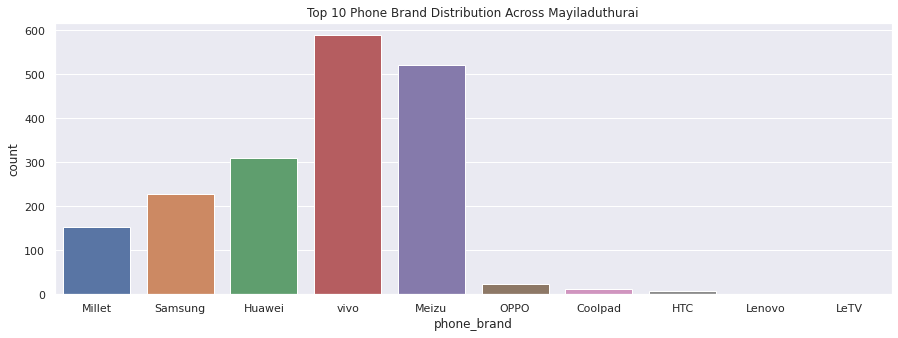

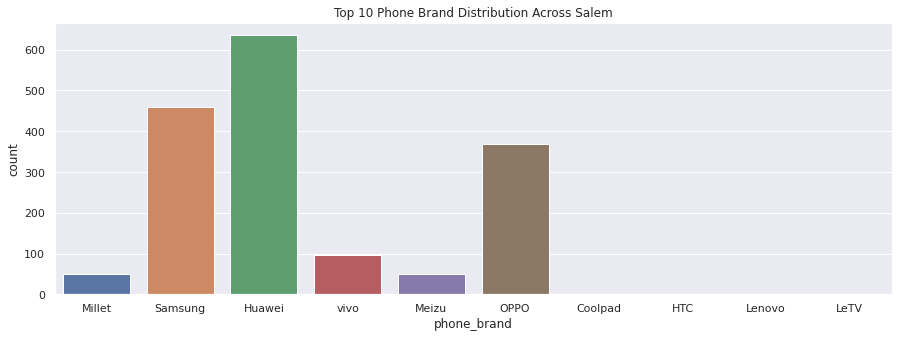

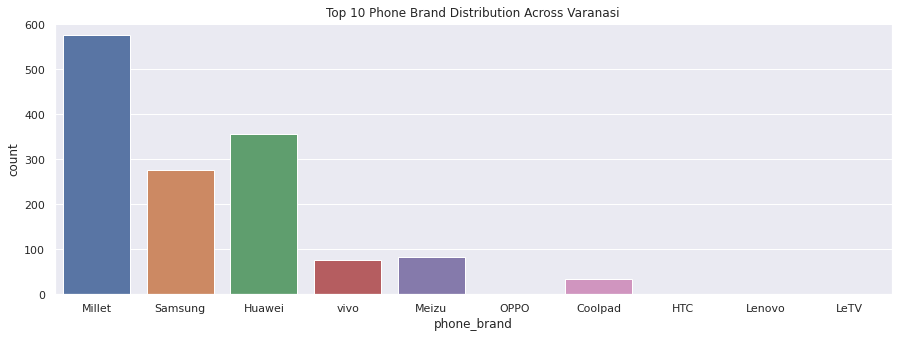

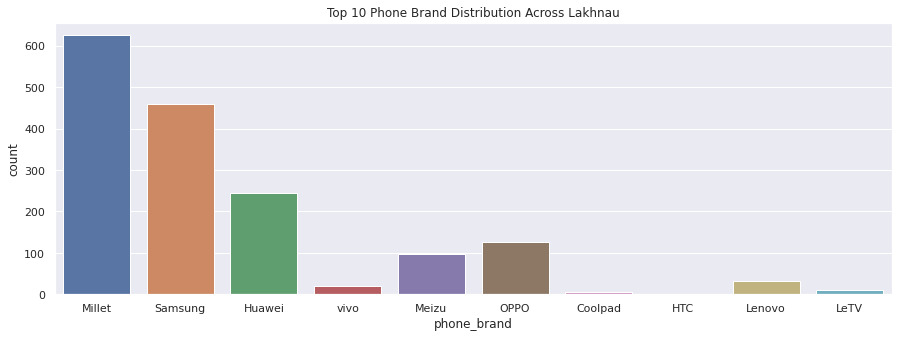

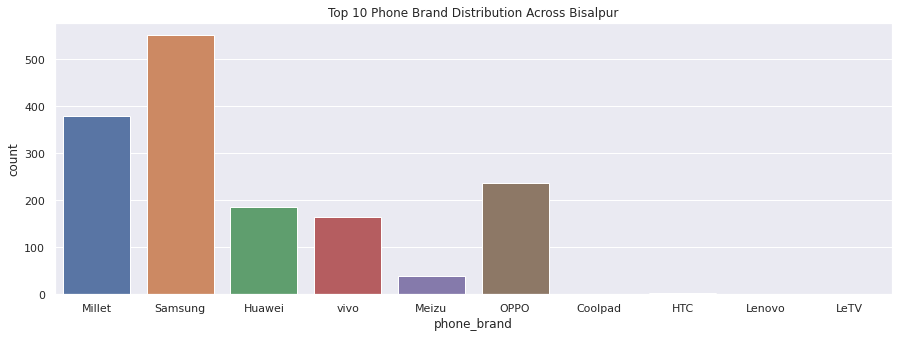

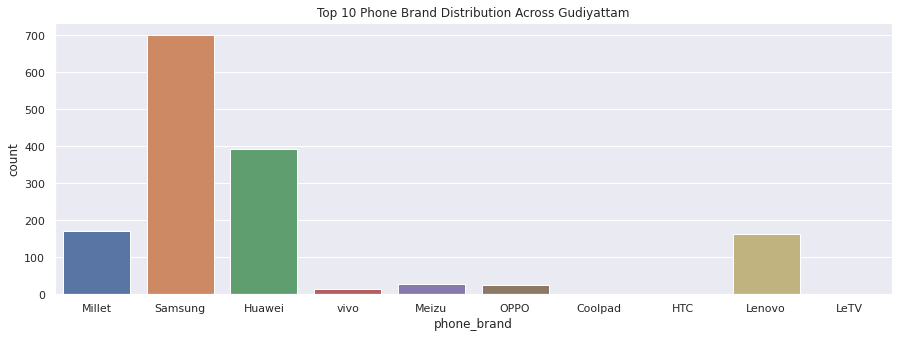

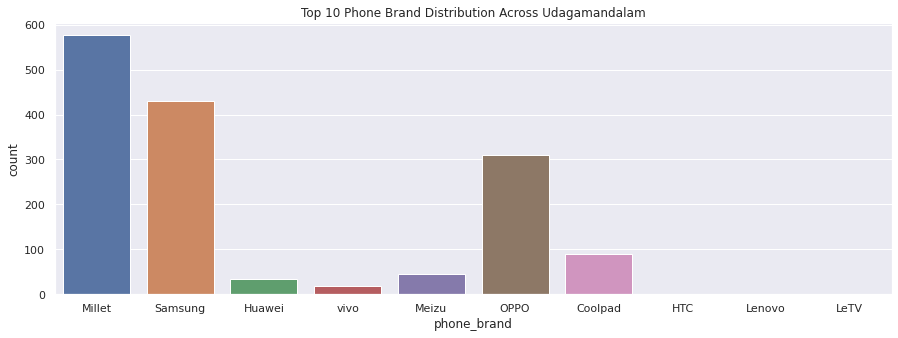

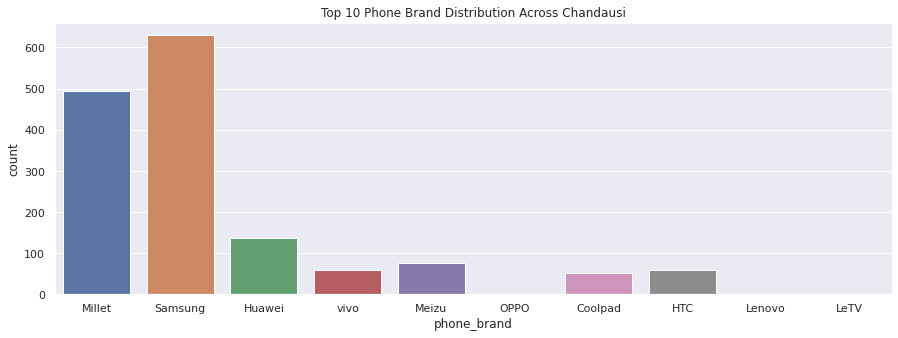

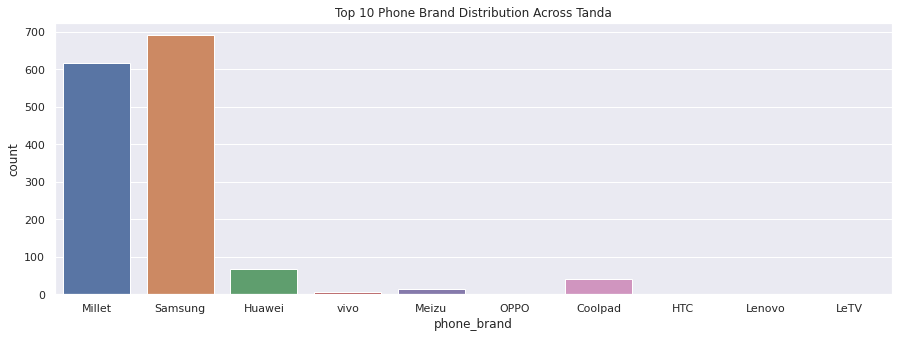

In [103]:
top_cities = ['Chennai', 'Mayiladuthurai', 'Salem', 'Varanasi', 'Lakhnau', 'Bisalpur', 'Gudiyattam', 'Udagamandalam', 'Chandausi', 'Tanda']
for i in top_cities:
    #print (i)
    #print (df_final[df_final['city']==i]['device_model'].value_counts().head(10))
    fig, axis1 = plt.subplots(1,1,figsize=(15,5))
    sns.countplot(x='phone_brand' ,order=df_final.phone_brand.value_counts().iloc[:10].index, data=df_final[df_final['city']==i], ax=axis1)
    plt.title("Top 10 Phone Brand Distribution Across " + i)

# Hourly distribution of Phone Calls

In [104]:
df_final.sample(10)

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,age_range
282424,1499716,9.091113e+17,2016-05-02 23:50:43,80.285527,13.122950,Chennai,TamilNadu,M,21,M22-,Samsung,Galaxy Grand Prime,18-29
146615,479146,-6.029019e+18,2016-05-06 03:02:18,80.301106,13.129538,Chennai,TamilNadu,F,36,F33-42,OPPO,N1T,30-49
43028,484398,-5.882655e+17,2016-05-06 08:48:03,77.461455,11.513579,Gopichettipalaiyam,TamilNadu,M,32,M32-38,Samsung,A880,30-49
187253,666570,-3.396496e+18,2016-05-03 05:03:45,80.298022,13.174382,Chennai,TamilNadu,M,33,M32-38,Samsung,Galaxy S3,30-49
387948,1962602,8.429238e+18,2016-05-02 09:36:07,78.236798,8.825842,Thuthukkudi,TamilNadu,M,41,M39+,Samsung,Galaxy S3,30-49
425981,647865,-5.362595e+18,2016-05-03 22:24:50,78.719853,10.857168,Tiruchchirappalli,TamilNadu,M,34,M32-38,Millet,Redmi 1S,30-49
242020,2114079,-7.304757e+18,2016-05-07 14:26:22,77.904952,28.484613,Bulandshahr,UttarPradesh,M,42,M39+,Huawei,Honor 6 Plus,30-49
436276,2868464,3.401455e+18,2016-05-01 01:05:51,80.290361,13.127932,Chennai,TamilNadu,F,40,F33-42,Millet,MI 2S,30-49
287133,805966,-7.527753e+18,2016-05-07 00:18:09,80.348958,13.108987,Chennai,TamilNadu,F,28,F27-28,vivo,X5V,18-29
226816,840743,-6.474259e+18,2016-05-07 09:37:11,80.368480,13.141588,Chennai,TamilNadu,M,26,M23-26,Lenovo,V5 Max,18-29


In [105]:
df_final['date'] = pd.to_datetime(df_final['timestamp']).dt.date
df_final['time'] = pd.to_datetime(df_final['timestamp']).dt.time
df_final['hour'] = pd.to_datetime(df_final['timestamp']).dt.hour
df_final['date'] = pd.to_datetime(df_final['date'])
df_final['day'] = pd.to_datetime(df_final['timestamp']).dt.day_name()
df_final['month']= pd.to_datetime(df_final['timestamp']).dt.month_name()

df_final['year']= pd.to_datetime(df_final['timestamp']).dt.year

In [106]:
df_final.sample(10)

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,age_range,date,time,hour,day,month,year
84432,1853323,-5.326189e+18,2016-05-01 13:18:06,80.344354,13.125814,Chennai,TamilNadu,M,33,M32-38,Millet,MI 4,30-49,2016-05-01,13:18:06,13,Sunday,May,2016
488717,260293,-3.316934e+18,2016-05-03 19:07:17,79.200780,28.083225,Budaun,UttarPradesh,F,33,F33-42,Samsung,Galaxy S5,30-49,2016-05-03,19:07:17,19,Tuesday,May,2016
6782,2414754,5.536513e+18,2016-05-05 05:46:27,80.359796,13.128174,Chennai,TamilNadu,M,32,M32-38,Millet,red rice 2,30-49,2016-05-05,05:46:27,5,Thursday,May,2016
1829,1955656,5.731369e+18,2016-05-02 01:34:11,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26,HTC,One max,18-29,2016-05-02,01:34:11,1,Monday,May,2016
313029,1736930,2.287449e+18,2016-05-05 22:45:58,80.300183,13.130255,Chennai,TamilNadu,F,28,F27-28,Samsung,Galaxy S4,18-29,2016-05-05,22:45:58,22,Thursday,May,2016
40456,3212540,7.983871e+18,2016-05-03 21:25:59,80.335435,13.189053,Chennai,TamilNadu,M,32,M32-38,Coolpad,Great God F2 full HD version,30-49,2016-05-03,21:25:59,21,Tuesday,May,2016
277164,2404158,1.613134e+17,2016-05-07 16:39:44,80.356920,13.134473,Chennai,TamilNadu,F,26,F24-26,Meizu,Charm Blue NOTE,18-29,2016-05-07,16:39:44,16,Saturday,May,2016
30753,1086457,5.536513e+18,2016-05-06 10:08:18,80.359796,13.128174,Chennai,TamilNadu,M,32,M32-38,Millet,red rice 2,30-49,2016-05-06,10:08:18,10,Friday,May,2016
111126,1027052,-3.361582e+18,2016-05-06 00:41:35,80.309344,13.168230,Chennai,TamilNadu,M,22,M22-,vivo,Xplay,18-29,2016-05-06,00:41:35,0,Friday,May,2016
39468,392961,7.983871e+18,2016-05-03 18:05:22,80.335435,13.189053,Chennai,TamilNadu,M,32,M32-38,Coolpad,Great God F2 full HD version,30-49,2016-05-03,18:05:22,18,Tuesday,May,2016


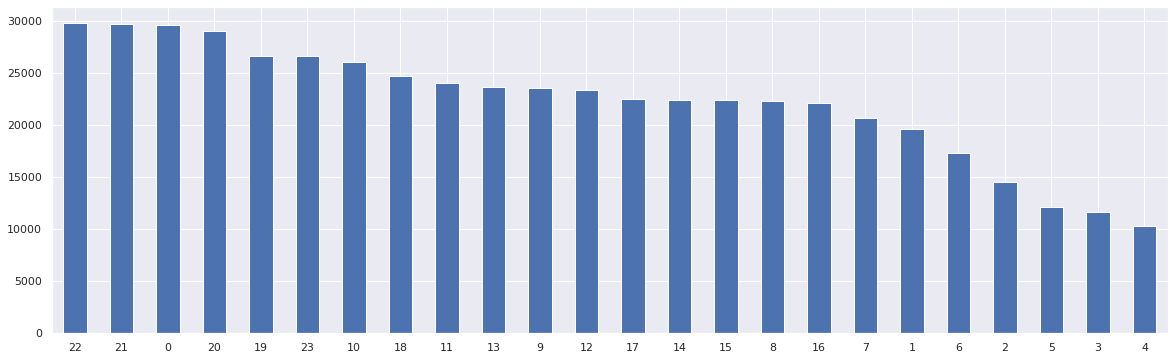

In [107]:
df_final['hour'].value_counts(sort=True).plot.bar(rot=0,figsize=(20, 6))

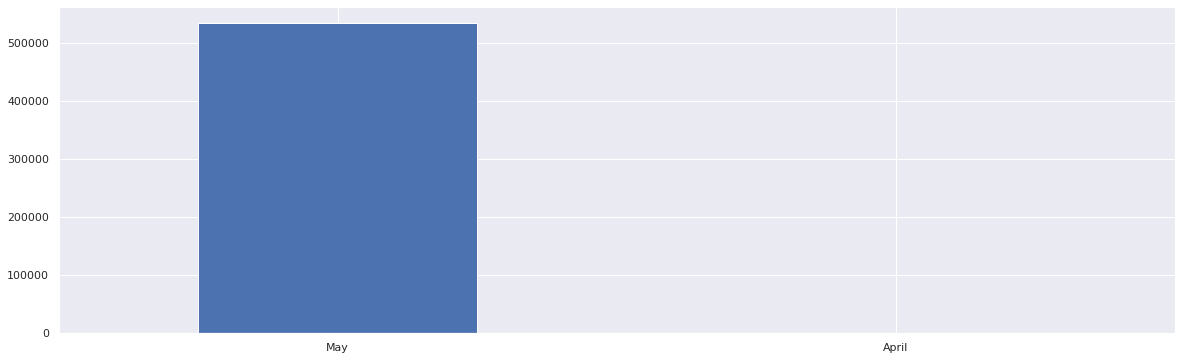

In [108]:
df_final['month'].value_counts(sort=True).plot.bar(rot=0,figsize=(20, 6))

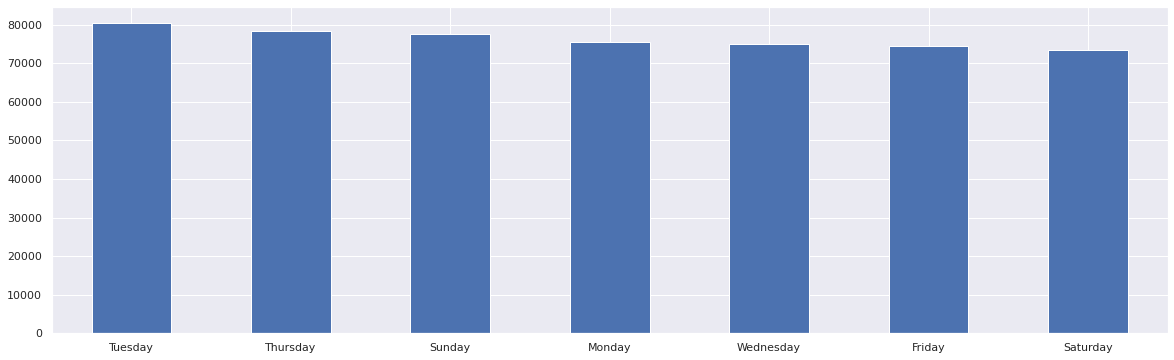

In [109]:
df_final['day'].value_counts(sort=True).plot.bar(rot=0,figsize=(20, 6))

Text(0.5, 1.0, 'Top 10 Phone Brand Distribution Across States')

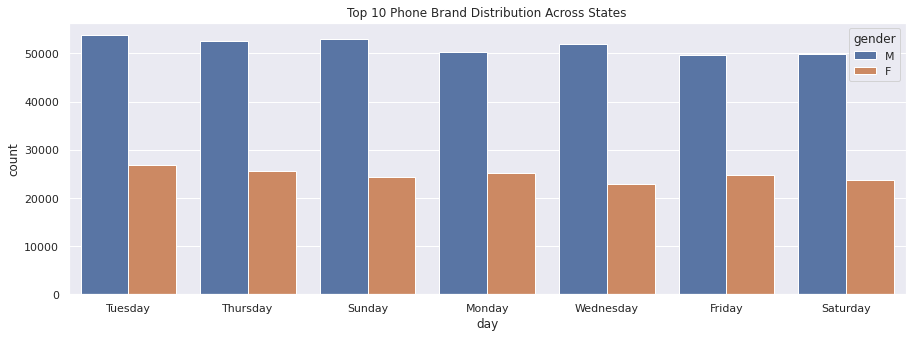

In [110]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='day', hue="gender",order=df_final.day.value_counts().iloc[:10].index, data=df_final, ax=axis1)
plt.title("Top 10 Phone Brand Distribution Across States")

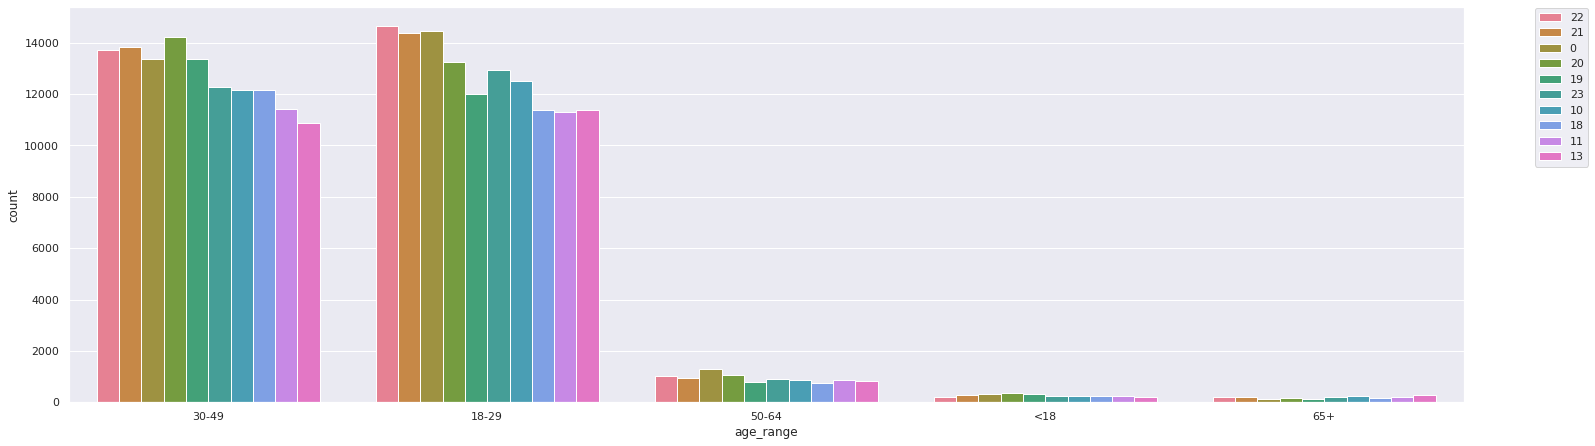

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 7.27)
sns.countplot(x='age_range',data=df_final,hue='hour',palette=sns.color_palette("husl", 10), 
              order=df_final['age_range'].value_counts().iloc[0:10].index, 
              hue_order=df_final['hour'].value_counts().iloc[:10].index)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)

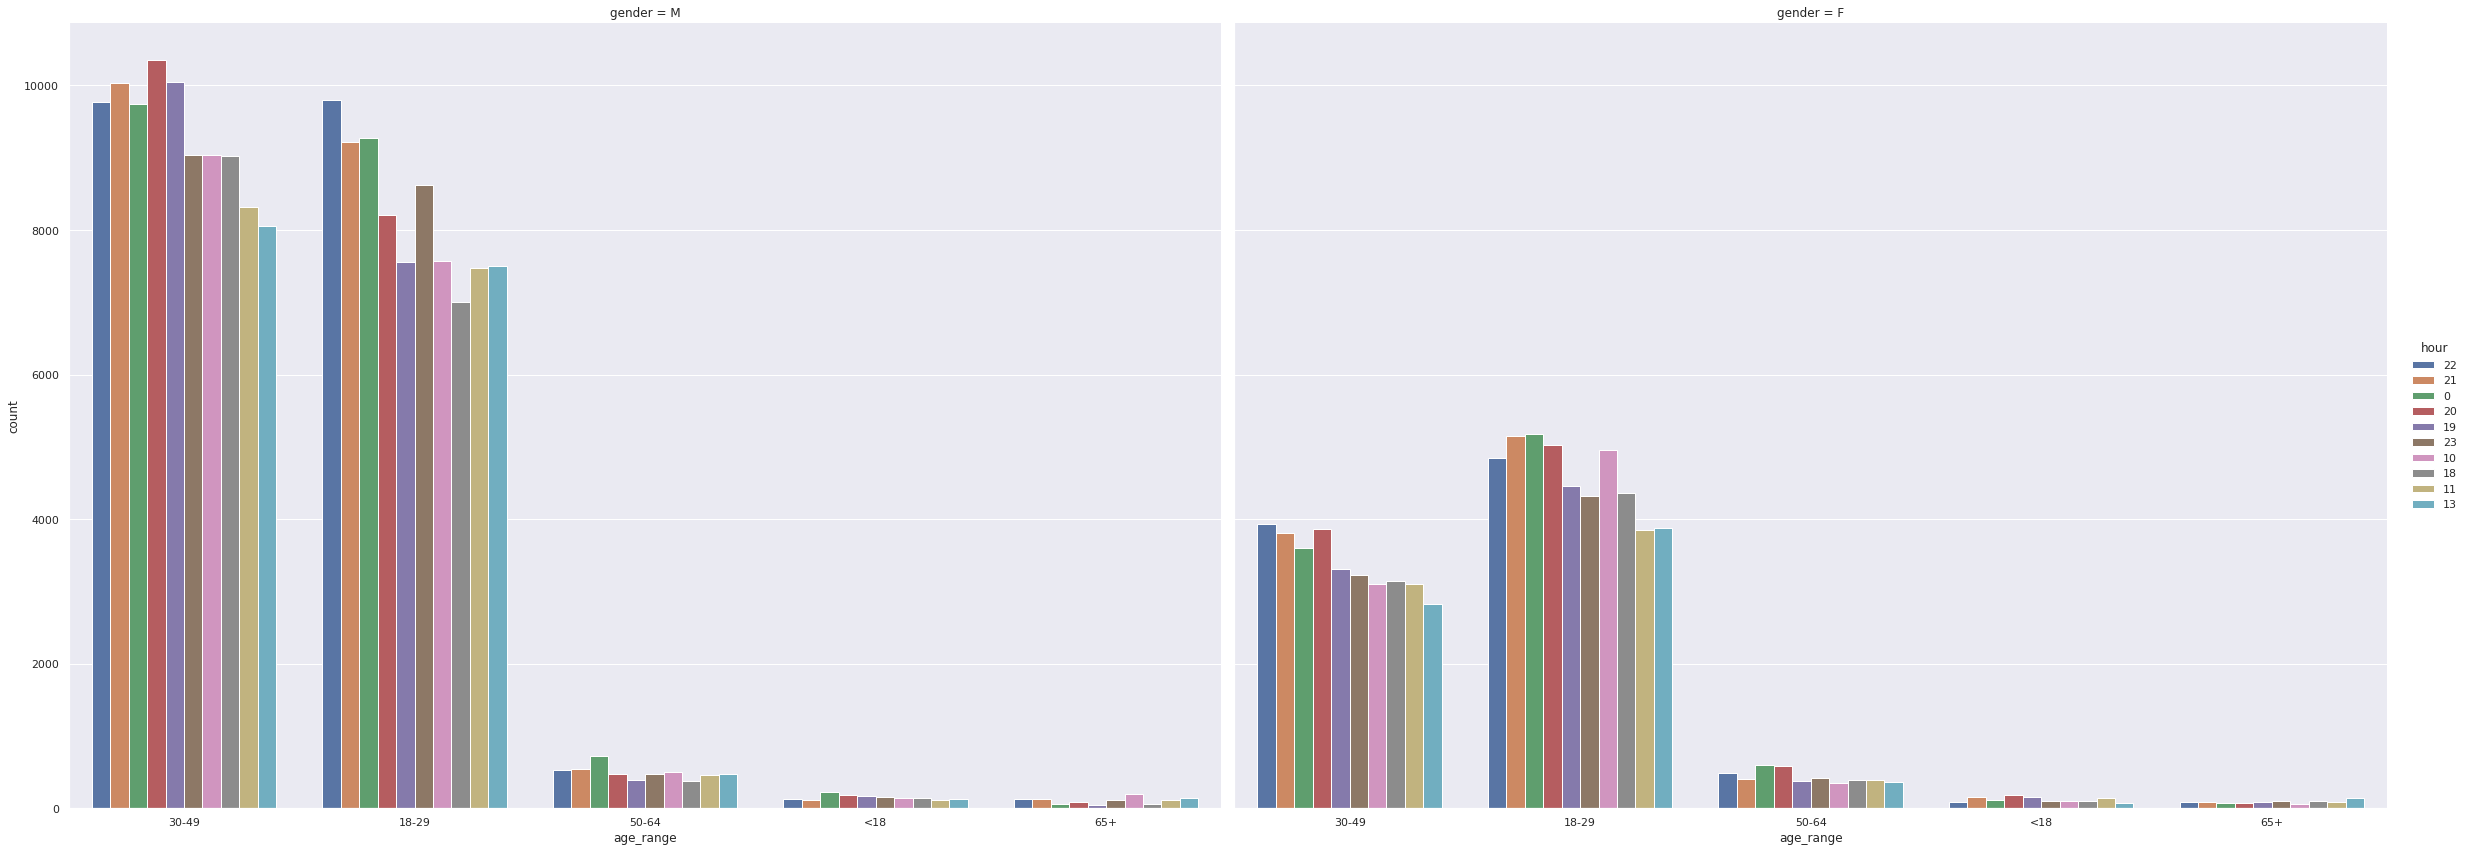

In [112]:
sns.catplot(x="age_range", hue="hour", col="gender",palette=sns.color_palette(),
                data=df_final, kind="count",
                height=12, aspect=1.4,order=df_final['age_range'].value_counts().iloc[0:10].index, 
              hue_order=df_final['hour'].value_counts().iloc[:10].index);

# Plot the Users on the Map using any suitable package